In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from iaml_cw2_helpers import *
from iaml212cw2_my_helpers import *
from sklearn.decomposition import PCA
%matplotlib inline
X, Y = load_Q1_dataset()
print('X: ', X.shape, 'Y: ', Y.shape)
Xtrn = X[100:, :]; Ytrn = Y[100:] #traning dataset
Xtst = X[0: 100, :]; Ytst = Y[0: 100] #test dataset

X:  (800, 9) Y:  (800,)


In [3]:
print_versions()


Python	3.9.7 <=> 3.9.2
Scipy	1.7.0 : Ok
Numpy	1.21.1 : Ok
Sklearn	0.24.2 : Ok
Pandas	1.3.1 : Ok
Matplotlib	3.4.2 : Ok
Seaborn	0.11.1 : Ok


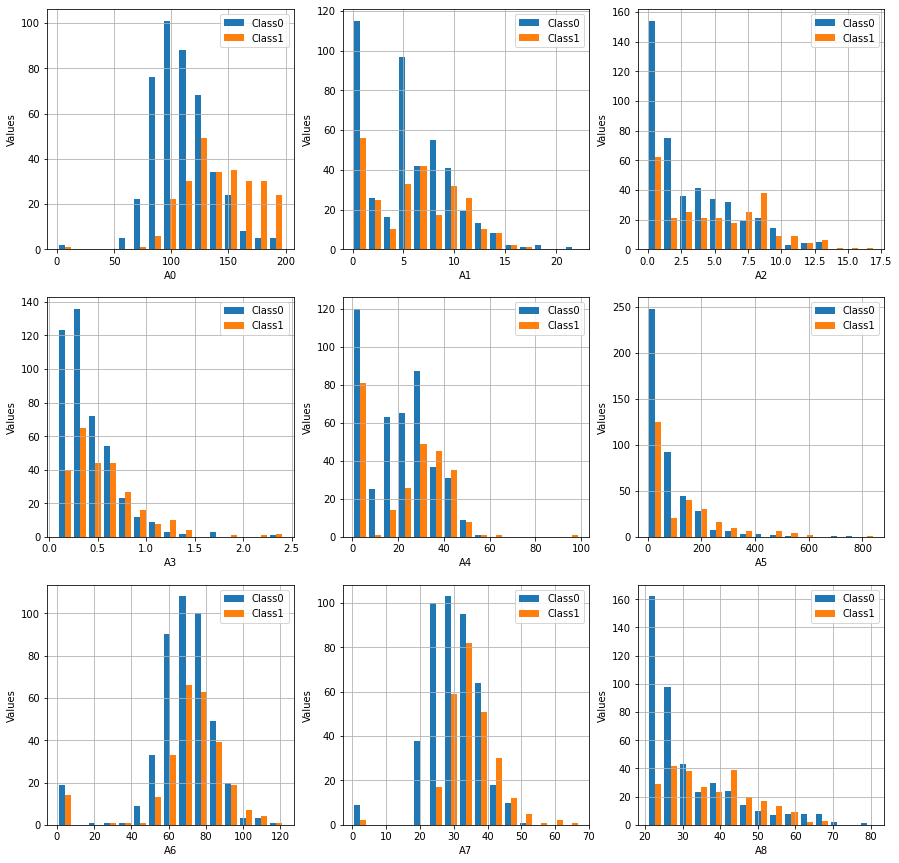

In [4]:
#Q1.1
fig, ax = plt.subplots(3,3, figsize = (15,15))
for i in range(len(Xtrn[0])):
    Xa = []
    Xb = []
    for j in range(len(Xtrn)):
        if Ytrn[j] == 0:
            Xa.append(Xtrn[j][i])
        elif Ytrn[j] == 1:
            Xb.append(Xtrn[j][i])
        else:
            print("Unexpected class {0}".format(Ytrn[j]))
    ax_now = ax[int(i/3)][i%3]
    ax_now.hist([Xa, Xb], bins=15)
    ax_now.grid()
    ax_now.set_xlabel("A{0}".format(i))
    ax_now.set_ylabel("Values")
    ax_now.legend(["Class0", "Class1"],loc="upper right")

In [5]:
#Q1.2
def calculate_r(x,y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    x_diff = np.array([x-x_mean for x in x])
    x_diff_sqr = np.array([(x-x_mean)**2 for x in x])
    y_diff = np.array([y-y_mean for y in y])
    y_diff_sqr = np.array([(y-y_mean)**2 for y in y])
    return np.sum(x_diff*y_diff) / np.sqrt(np.sum(x_diff_sqr)*np.sum(y_diff_sqr))

r = []
for i in range(len(Xtrn[0])):
    x_ith_feature_array = [elem[i] for elem in Xtrn]
    r_value = calculate_r(x_ith_feature_array,Ytrn)
    # r_value = scipy.stats.pearsonr(x_ith_feature_array, Ytrn)[0]
    r.append(r_value)
    print("A{0} correlation coefficients is {1}".format(i,r_value))

A0 correlation coefficients is 0.4911758969080455
A1 correlation coefficients is 0.08740589845788756
A2 correlation coefficients is 0.22728719153958366
A3 correlation coefficients is 0.20736605298986854
A4 correlation coefficients is 0.10772034997696238
A5 correlation coefficients is 0.1856714007677247
A6 correlation coefficients is 0.07626074493410924
A7 correlation coefficients is 0.3044537676199444
A8 correlation coefficients is 0.24034733335192388


Sum of all the variances: 16621.85711886551


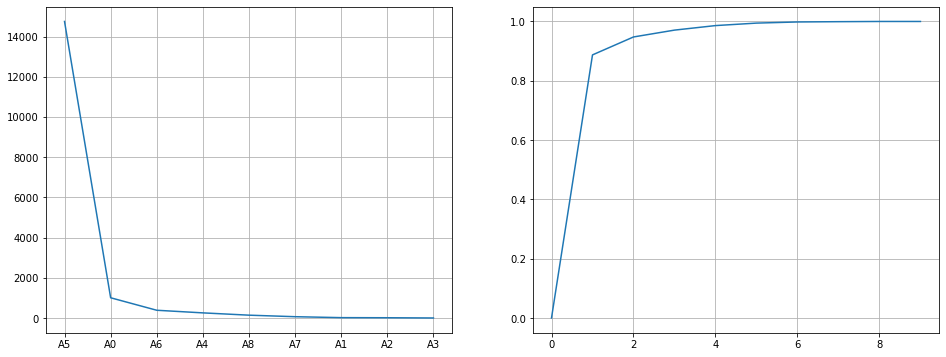

In [6]:
#Q1.4
variance_array = dict()
for i in range(len(Xtrn[0])):
    x_ith_feature_array = [elem[i] for elem in Xtrn]
    variance_array["A{0}".format(i)] = np.var(x_ith_feature_array)
variance_array = dict(reversed(sorted(variance_array.items(), key=lambda item: item[1])))
sum_of_variances = np.sum(list(variance_array.values()))
print('Sum of all the variances: {0}'.format(sum_of_variances))
fig, ax = plt.subplots(1,2, figsize = (16,6))

# sns.lineplot(x=variance_array.keys(),y=variance_array.values(), ax=ax[0])
#TODO check graph type
ax[0].plot(variance_array.keys(),variance_array.values())
ax[0].grid()
variance_cumulative_ratio_array = np.cumsum(list(variance_array.values())) / sum_of_variances
variance_cumulative_ratio_array = np.insert(variance_cumulative_ratio_array,0, 0)
ax[1].plot(range(len(variance_cumulative_ratio_array)),variance_cumulative_ratio_array)
ax[1].grid()

[8.99347462e-01 5.40343582e-02 2.37870232e-02 1.17415453e-02
 6.84463453e-03 2.77737266e-03 9.93065305e-04 4.68599549e-04
 5.93945417e-06]
[[-88.48961299  -0.82651381]
 [196.34286052 -52.58081499]
 [ 93.99775534   3.95616421]
 ...
 [413.44775913 -20.03871517]
 [-87.67238222  -4.75176836]
 [ 17.66472726  19.25686184]]


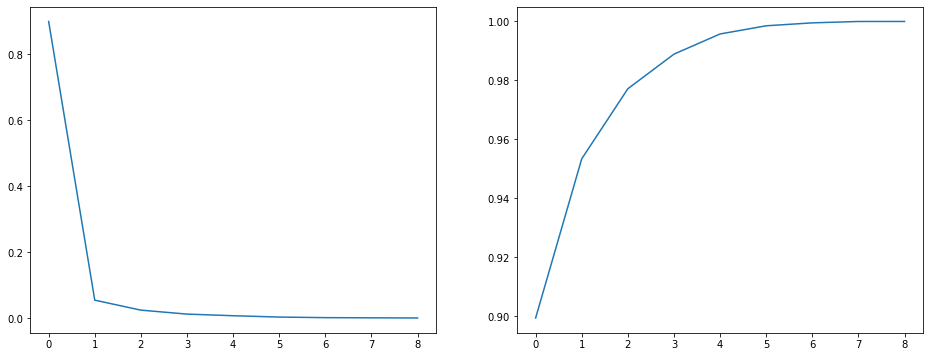

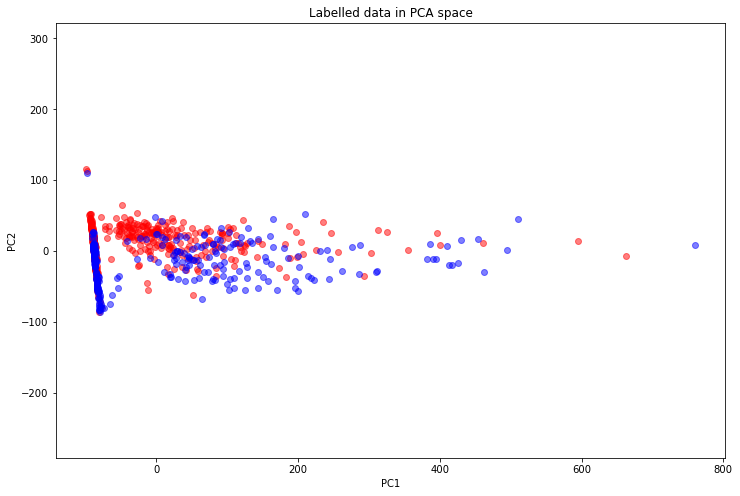

,A0,A1,A2,A3,A4,A5,A6,A7,A8
PC1,0.385593,-0.045825,-0.057052,0.185793,0.459240,0.999678,0.100572,0.232302,-0.001574
PC2,-0.914289,-0.090773,-0.225463,-0.079872,0.097165,0.024085,-0.255392,-0.172606,-0.373444


In [7]:
#Q1.5
pca = PCA().fit(Xtrn)
explained_ratio = pca.explained_variance_ratio_
print(explained_ratio)
fig, ax = plt.subplots(1,2, figsize = (16,6))
#TODO check graph type
ax[0].plot(explained_ratio)
# ax[0].xlabel('number of components')
# ax[0].ylabel('cumulative explained variance')

ax[1].plot(np.cumsum(explained_ratio)/ np.sum(explained_ratio))

pca_2d = PCA(n_components=2).fit_transform(Xtrn)
print(pca_2d)
pca_2d_class0 = []
pca_2d_class1 = []
for i in range(len(pca_2d)):
    if Ytrn[i] == 0:
        pca_2d_class0.append(pca_2d[i])
    elif Ytrn[i] == 1:
        pca_2d_class1.append(pca_2d[i])
    else:
        print("Unexpected class {0}".format(Ytrn[i]))

plt.figure(figsize=(12,8))
plt.scatter(x=[point[0] for point in pca_2d_class0], y=[point[1] for point in pca_2d_class0], c='red', alpha=0.5)
plt.scatter(x=[point[0] for point in pca_2d_class1], y=[point[1] for point in pca_2d_class1], c='blue', alpha=0.5)
plt.axis('equal')
plt.title('Labelled data in PCA space')
plt.xlabel('PC1')
plt.ylabel('PC2')
top_plot = plt.gca()
plt.show()


pc1 = [point[0] for point in pca_2d]
pc2 = [point[1] for point in pca_2d]
pc1_r = []
pc2_r = []
labels = []
for i in range(len(Xtrn[0])):
    x_ith_feature_array = [elem[i] for elem in Xtrn]
    pc1_r.append(scipy.stats.pearsonr(x_ith_feature_array, pc1)[0])
    pc2_r.append(scipy.stats.pearsonr(x_ith_feature_array, pc2)[0])
    labels.append('A{0}'.format(i))
pca_correlation_coefficient = pd.DataFrame(data=[pc1_r,pc2_r], columns=labels, index=['PC1', 'PC2'])
pca_correlation_coefficient

[0.24182043 0.1894532  0.11653636 0.11116337 0.09671205 0.08233666
 0.0729431  0.04545617 0.04357865]
[[-1.47111815e+00  1.12034934e+00]
 [ 2.10332737e+00 -1.51716117e+00]
 [-3.77942531e-01 -8.34907680e-01]
 ...
 [ 3.34667666e+00  9.64860656e-01]
 [-1.92796467e-04 -7.93335345e-02]
 [ 9.10685592e-01  1.64326590e+00]]


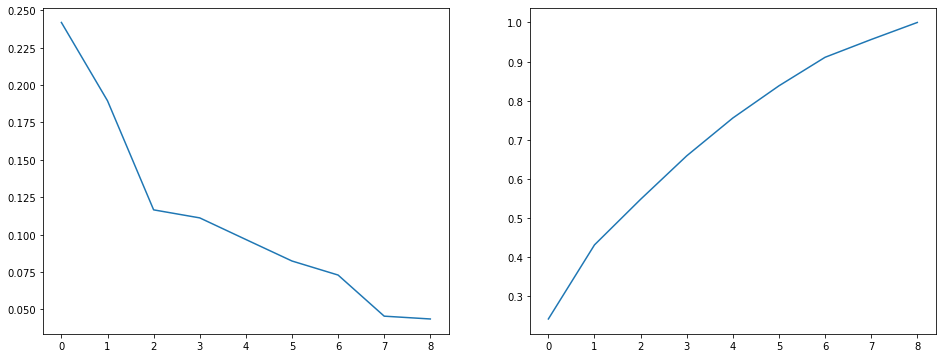

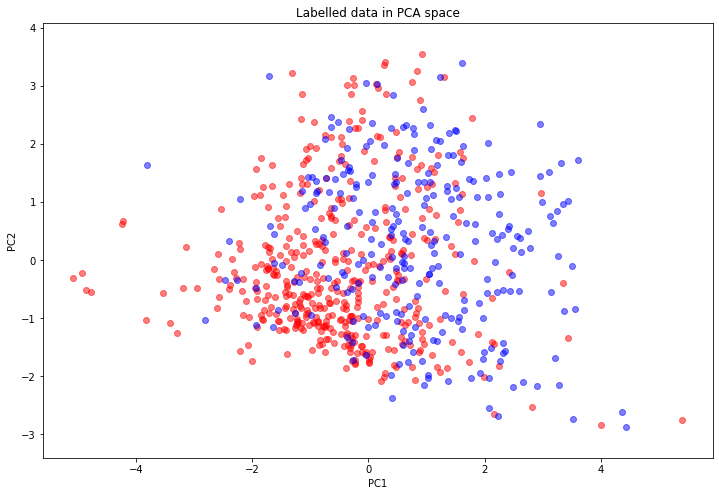

,A0,A1,A2,A3,A4,A5,A6,A7,A8
PC1,0.600671,0.057296,0.267952,0.365655,0.623038,0.629857,0.522851,0.651161,0.352864
PC2,0.177432,0.100037,0.759983,-0.207643,-0.465990,-0.369796,0.224228,-0.168450,0.781249


In [8]:
#1.6
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(Xtrn)
Xtrn_s = scaler.transform(Xtrn)
Xtst_s = scaler.transform(Xtst)

pca = PCA().fit(Xtrn_s)
explained_ratio = pca.explained_variance_ratio_
print(explained_ratio)
fig, ax = plt.subplots(1,2, figsize = (16,6))
#TODO check graph type
ax[0].plot(explained_ratio)
# ax[0].xlabel('number of components')
# ax[0].ylabel('cumulative explained variance')

ax[1].plot(np.cumsum(explained_ratio)/ np.sum(explained_ratio))

pca_2d = PCA(n_components=2).fit_transform(Xtrn_s)
print(pca_2d)
pca_2d_class0 = []
pca_2d_class1 = []
for i in range(len(pca_2d)):
    if Ytrn[i] == 0:
        pca_2d_class0.append(pca_2d[i])
    elif Ytrn[i] == 1:
        pca_2d_class1.append(pca_2d[i])
    else:
        print("Unexpected class {0}".format(Ytrn[i]))

plt.figure(figsize=(12,8))
plt.scatter(x=[point[0] for point in pca_2d_class0], y=[point[1] for point in pca_2d_class0], c='red', alpha=0.5)
plt.scatter(x=[point[0] for point in pca_2d_class1], y=[point[1] for point in pca_2d_class1], c='blue', alpha=0.5)
plt.axis('equal')
plt.title('Labelled data in PCA space')
plt.xlabel('PC1')
plt.ylabel('PC2')
top_plot = plt.gca()
plt.show()


pc1 = [point[0] for point in pca_2d]
pc2 = [point[1] for point in pca_2d]
pc1_r = []
pc2_r = []
labels = []
for i in range(len(Xtrn[0])):
    x_ith_feature_array = [elem[i] for elem in Xtrn]
    pc1_r.append(scipy.stats.pearsonr(x_ith_feature_array, pc1)[0])
    pc2_r.append(scipy.stats.pearsonr(x_ith_feature_array, pc2)[0])
    labels.append('A{0}'.format(i))
pca_correlation_coefficient = pd.DataFrame(data=[pc1_r,pc2_r], columns=labels, index=['PC1', 'PC2'])
pca_correlation_coefficient

<ErrorbarContainer object of 3 artists>

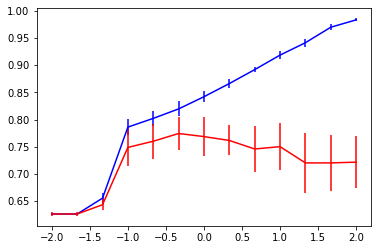

In [9]:
#1.8
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
C_value_list = np.logspace(-2,2,num=13)
svc_train_result_dict = dict()
svc_test_result_dict = dict()
for C in C_value_list:
    skf = StratifiedKFold()
    train_score_list = []
    test_score_list = []
    for train_index, test_index in skf.split(Xtrn_s, Ytrn):
        X_train, y_train = Xtrn_s[train_index], Ytrn[train_index]
        X_test, y_test = Xtrn_s[test_index], Ytrn[test_index]
        clf = SVC(C=C).fit(X_train, y_train)
        train_score_list.append(clf.score(X_train, y_train))
        test_score_list.append(clf.score(X_test, y_test))
    svc_train_result_dict[C] = train_score_list
    svc_test_result_dict[C] = test_score_list
svc_train_result_mean = [np.mean(value) for key,value in svc_train_result_dict.items()]
svc_train_result_std = [np.std(value) for key,value in svc_train_result_dict.items()]
svc_test_result_mean = [np.mean(value) for key,value in svc_test_result_dict.items()]
svc_test_result_std = [np.std(value) for key,value in svc_test_result_dict.items()]
C_value_list_log = [np.log10(C) for C in C_value_list]
plt.errorbar(x=C_value_list_log,y=svc_train_result_mean,yerr=svc_train_result_std,color='blue')
plt.errorbar(x=C_value_list_log,y=svc_test_result_mean,yerr=svc_test_result_std,color='red')

In [10]:
print('Best C is %f' % C_value_list[5])
clf = SVC(C=C_value_list[5]).fit(Xtrn_s, Ytrn)
print(clf.score(Xtrn_s, Ytrn))
print(clf.score(Xtst_s, Ytst))

Best C is 0.464159
0.8142857142857143
0.75


[[95.14113475 41.46999034]
 [41.46999034 46.69341618]]
[[9.70444387e-08 9.51872703e-08 9.17132313e-08 ... 1.61918288e-16
  6.86142800e-17 2.85613032e-17]
 [1.89748506e-07 1.89092433e-07 1.85103587e-07 ... 6.67143223e-16
  2.87226991e-16 1.21472039e-16]
 [3.57754018e-07 3.62216197e-07 3.60243468e-07 ... 2.65057864e-15
  1.15940302e-15 4.98164827e-16]
 ...
 [3.91062650e-11 8.08295239e-11 1.64111345e-10 ... 1.06954305e-04
  9.55063697e-05 8.37743964e-05]
 [1.38286795e-11 2.90396887e-11 5.99029351e-11 ... 7.96981247e-05
  7.23052336e-05 6.44371415e-05]
 [4.71534553e-12 1.00603324e-11 2.10841472e-11 ... 5.72659375e-05
  5.27843976e-05 4.77924908e-05]]


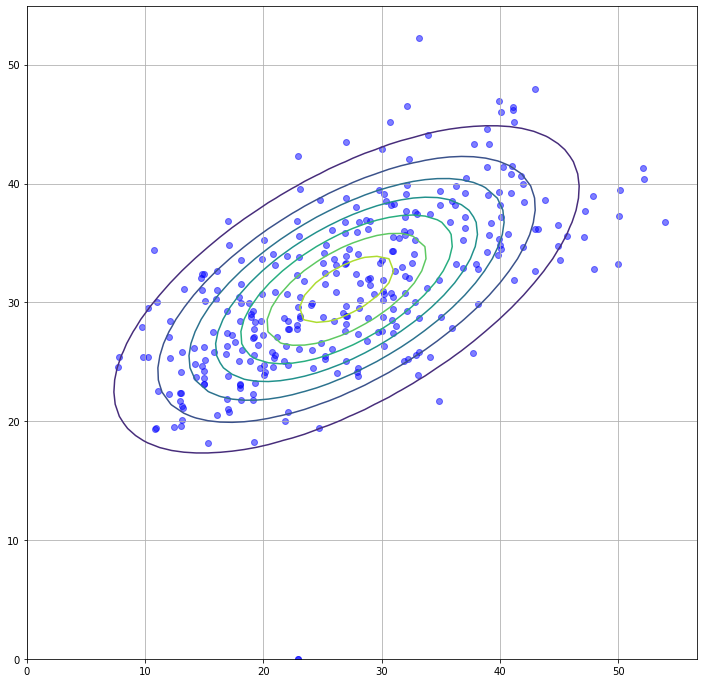

In [11]:
#1.9
# print(len(Xtrn[0]))
Ztrn = []
for i in range(len(Xtrn)):
    if Ytrn[i] == 0 and Xtrn[i][4] > 1:
        Ztrn.append(np.array([Xtrn[i][4],Xtrn[i][7]]))
Ztrn = np.array(Ztrn)
# Ztrn
# print(np.mean(Ztrn, axis=0))
# print(np.cov(Ztrn, rowvar=False))
mean_vector = np.mean(Ztrn, axis=0)
variance_cov_matrix = np.cov(Ztrn, rowvar=False)
print(variance_cov_matrix)
variance_cov_matrix_inv = np.linalg.inv(variance_cov_matrix)
variance_cov_matrix_det = np.linalg.det(variance_cov_matrix)

Ztrn_x = [point[0] for point in Ztrn]
Ztrn_y = [point[1] for point in Ztrn]

Ztrn_X,Ztrn_Y = np.meshgrid(np.linspace(0, 50),np.linspace(0, 50))
coe = 1.0 / ((2 * np.pi)**2 * variance_cov_matrix_det)**0.5
Z = coe * np.e ** (-0.5 * (variance_cov_matrix_inv[0,0]*(Ztrn_X-mean_vector[0])**2 +
                           (variance_cov_matrix_inv[0,1] + variance_cov_matrix_inv[1,0])
                           *(Ztrn_X-mean_vector[0])*(Ztrn_Y-mean_vector[1]) + variance_cov_matrix_inv[1,1]*(Ztrn_Y-mean_vector[1])**2))

print(Z)

plt.figure(figsize=(12,12))
plt.scatter(x=Ztrn_x, y=Ztrn_y, c='blue', alpha=0.5)
plt.contour(np.linspace(0, 50),np.linspace(0, 50),Z)
plt.grid()
plt.show()

[[94.84194889038014, 0], [0, 46.546581630382484]]


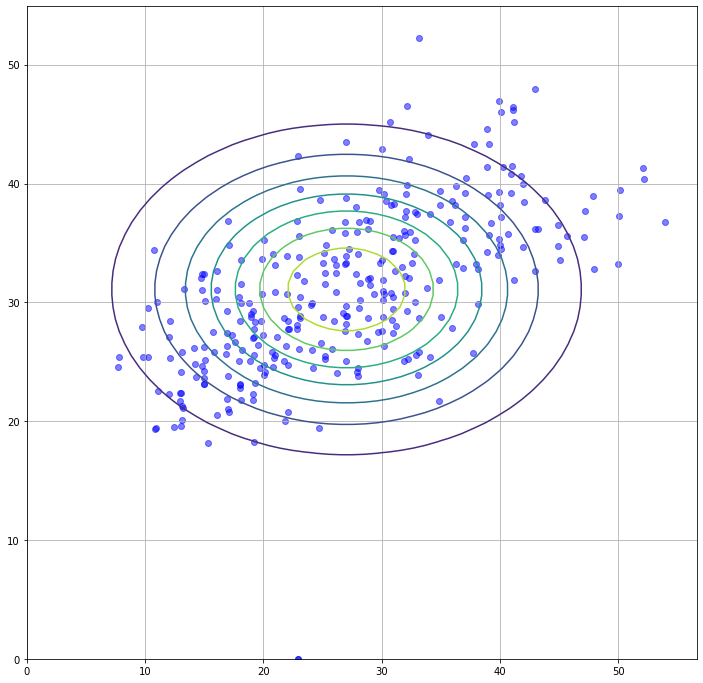

In [40]:
from sklearn.naive_bayes import GaussianNB

#1.10
some_points = list(zip(np.linspace(0, 50),np.linspace(0, 50)))
# gnb = GaussianNB(priors=[1.0, 0])
gnb = GaussianNB()
gnb.fit(Ztrn, np.zeros(len(Ztrn)))
# some_points
# print(gnb.sigma_)
# print(gnb.theta_)
# print(gnb.class_prior_)


mean_vector = [gnb.theta_[0][0],gnb.theta_[0][1]]
variance_cov_matrix = [[gnb.sigma_[0][0],0],[0,gnb.sigma_[0][1]]]
print(variance_cov_matrix)
variance_cov_matrix_inv = np.linalg.inv(variance_cov_matrix)
variance_cov_matrix_det = np.linalg.det(variance_cov_matrix)

Ztrn_x = [point[0] for point in Ztrn]
Ztrn_y = [point[1] for point in Ztrn]

Ztrn_X,Ztrn_Y = np.meshgrid(np.linspace(0, 50),np.linspace(0, 50))
coe = 1.0 / ((2 * np.pi)**2 * variance_cov_matrix_det)**0.5
Z = coe * np.e ** (-0.5 * (variance_cov_matrix_inv[0,0]*(Ztrn_X-mean_vector[0])**2 +
                           (variance_cov_matrix_inv[0,1] + variance_cov_matrix_inv[1,0])
                           *(Ztrn_X-mean_vector[0])*(Ztrn_Y-mean_vector[1]) + variance_cov_matrix_inv[1,1]*(Ztrn_Y-mean_vector[1])**2))


plt.figure(figsize=(12,12))
plt.scatter(x=Ztrn_x, y=Ztrn_y, c='blue', alpha=0.5)
plt.contour(np.linspace(0, 50),np.linspace(0, 50),Z)
plt.grid()
plt.show()